<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #7: Clasificación de textos
`Fecha de entrega: Abril 22, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [20]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Cargar datos
path = "reviews_vidjew_es.csv"
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


### `[8 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [4]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [5]:
print(f"Tenemos {data.shape[0]} datos en total.")
print(f"El conjunto de datos de entrenamiento (train) tiene {train.shape[0]} datos.")
print(f"El conjunto de datos de prueba (test) tiene {test.shape[0]} datos.")

Tenemos 1000 datos en total.
El conjunto de datos de entrenamiento (train) tiene 800 datos.
El conjunto de datos de prueba (test) tiene 200 datos.


###  `[8 pts]` Punto 2: Hacer pre-procesamiento del texto

In [6]:
stopwords_sp = stopwords.words('spanish')
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

In [12]:
train["review_body"].values

array(['Es el mismísimo juego del ordenador, creía que habrían mejorado los gráficos o algo. El juego en sí está bien, pero se queda corto para los que hay ahora.',
       'la primera vez que compro en amazon y no será la ultima porque ha sido perfecta.',
       'Muy buenas, compramos el colgante en forma de corazón, nos ha salido defectuoso, no creo que sea de plata. Vino en la caja ya un poco rayado, pero se ha ido rayando llevándolo en el cuerpo, sin caerse y pasando de la caja al cuello. No ha durado bonito ni dos días. Sin duda no pagaría casi 50€ por esto. Es del mismo vendedor, esperamos respuesta.',
       'No llegó el día que tocaba, lo pedí el 30 de agosto y me dijeron que llegaría el día de lanzamiento (17 de noviembre), pero aquí estoy viendo como mis amigos lo tienen y yo no. Nunca más lo volveré ha hacer de esta manera, NUNCA.',
       'LLevo mucho tiempo comprando en Amazón y nunca me había pasado una cosa así. Como a otros usuarios, después de esperar meses hasta el 23 

In [13]:
train

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
29,es_0311019,product_es_0316452,reviewer_es_0525360,2,"Es el mismísimo juego del ordenador, creía que...",Susana,es,video_games
535,es_0373637,product_es_0508408,reviewer_es_0195840,5,la primera vez que compro en amazon y no será ...,rapidez y confianza,es,video_games
695,es_0911214,product_es_0090166,reviewer_es_0373957,1,"Muy buenas, compramos el colgante en forma de ...",No es de plata,es,jewelry
557,es_0224520,product_es_0142812,reviewer_es_0031302,1,"No llegó el día que tocaba, lo pedí el 30 de a...",No a tiempo,es,video_games
836,es_0743628,product_es_0276927,reviewer_es_0315450,1,LLevo mucho tiempo comprando en Amazón y nunca...,Vergonzoso,es,video_games
...,...,...,...,...,...,...,...,...
106,es_0050050,product_es_0125088,reviewer_es_0029460,2,"En la PS4, de la que tengo dos mandos original...",sin mandos no puedes jugar,es,video_games
270,es_0039035,product_es_0598501,reviewer_es_0258742,5,"Son perfectos vienen dos, se ajustan perfectam...",Perfectos,es,jewelry
860,es_0556562,product_es_0280994,reviewer_es_0346229,2,Bastante pobre. A la semana ya se ha pelado. E...,Pobre,es,jewelry
435,es_0436117,product_es_0137895,reviewer_es_0761766,3,"Caja correcta, con su CD. Le he quitado dos es...",Lo esperado.,es,video_games


###  `[10 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, Árbol de Decisión, u otro.

In [14]:
X_train = tfidf_vect.fit_transform(train["review_body"].values)
y_train = train["product_category"].values

X_test = tfidf_vect.transform(test["review_body"].values)
y_test = test["product_category"].values

print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")

Tamaño de X_train (entrenamiento): (800, 3221)
Tamaño de X_test (prueba): (200, 3221)
Tamaño de y_train 800 y tamaño de y_test 200


In [21]:
# Inicializar los clasificadores
nb = MultinomialNB()
logreg = LogisticRegression(class_weight='balanced')
svm = LinearSVC(class_weight='balanced')
dt = DecisionTreeClassifier(class_weight='balanced')


# Entrenamos los modelos
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced')

###  `[10 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [23]:
y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_dt = dt.predict(X_test)


#### Exactitud

print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):>15.2f}")
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")
print(f"SVM: {accuracy_score(y_test, y_pred_svm):>23.2f}")
print(f"Árbol de decisión: {accuracy_score(y_test, y_pred_dt):>9.2f}")



metricas = [precision_score, recall_score, f1_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f"Naive Bayes: {metrica(y_test, y_pred_nb, pos_label='video_games'):.2f}")
    print(f"Regresión Logística: {metrica(y_test, y_pred_logreg, pos_label='video_games'):.2f}")
    print(f"SVM: {metrica(y_test, y_pred_svm, pos_label='video_games'):.2f}")
    print(f"Árbol de decisión: {metrica(y_test, y_pred_dt, pos_label='video_games'):.2f}")
    print()
    
    

Naive Bayes:            0.86
Regresión Logística:    0.86
SVM:                    0.84
Árbol de decisión:      0.74
precision_score
Naive Bayes: 0.94
Regresión Logística: 0.86
SVM: 0.86
Árbol de decisión: 0.78

recall_score
Naive Bayes: 0.79
Regresión Logística: 0.86
SVM: 0.83
Árbol de decisión: 0.70

f1_score
Naive Bayes: 0.86
Regresión Logística: 0.86
SVM: 0.84
Árbol de decisión: 0.74



###  `[BONUS: 3 pts]` Matriz de confusión

In [25]:

print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print()

print("Regresión Logística")
print(classification_report(y_test, y_pred_logreg))
print()

print("SVM")
print(classification_report(y_test, y_pred_svm))
print()

print("Árbol de decisión")
print(classification_report(y_test, y_pred_dt))
print()




confusion_matrix(y_test, y_pred_nb)

Naive Bayes
              precision    recall  f1-score   support

     jewelry       0.81      0.95      0.87        97
 video_games       0.94      0.79      0.86       103

    accuracy                           0.86       200
   macro avg       0.87      0.87      0.86       200
weighted avg       0.88      0.86      0.86       200


Regresión Logística
              precision    recall  f1-score   support

     jewelry       0.86      0.86      0.86        97
 video_games       0.86      0.86      0.86       103

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200


SVM
              precision    recall  f1-score   support

     jewelry       0.82      0.86      0.84        97
 video_games       0.86      0.83      0.84       103

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84   

array([[92,  5],
       [22, 81]], dtype=int64)

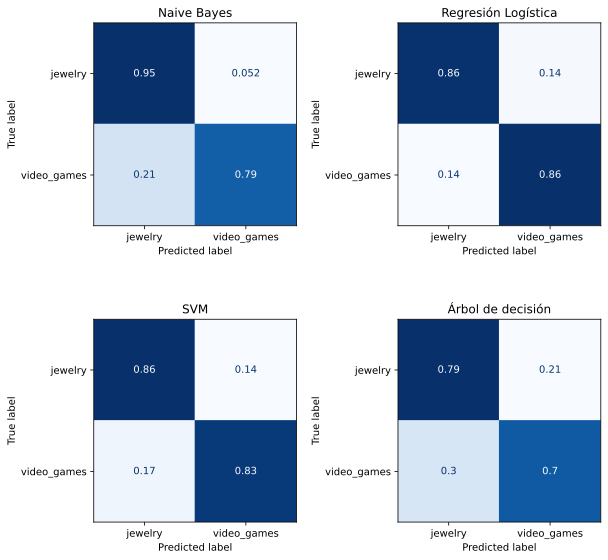

In [26]:

%config InlineBackend.figure_format = 'svg'

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
plot_confusion_matrix(nb, X_test, y_test, cmap="Blues", ax=ax1, normalize='true').im_.colorbar.remove()
plt.title("Naive Bayes")

ax2 = fig.add_subplot(2,2,2)
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Blues', ax=ax2, normalize='true').im_.colorbar.remove()
plt.title("Regresión Logística")

ax3 = fig.add_subplot(2,2,3)
plot_confusion_matrix(svm, X_test, y_test, cmap = 'Blues', ax=ax3, normalize='true').im_.colorbar.remove() 
plt.title("SVM");

ax4 = fig.add_subplot(2,2,4)
plot_confusion_matrix(dt, X_test, y_test, cmap = 'Blues', ax=ax4, normalize='true').im_.colorbar.remove() 
plt.title("Árbol de decisión");

###  `[12 pts]` Punto 5: Términos más importantes de cada categoría

In [27]:
# Explicación 
vocab = {value:key for key,value in tfidf_vect.vocabulary_.items()}
vocab


{1897: 'mismísimo',
 1637: 'juego',
 2077: 'ordenador',
 685: 'creía',
 1840: 'mejorado',
 1424: 'gráficos',
 294: 'bien',
 2466: 'queda',
 670: 'corto',
 103: 'ahora',
 2366: 'primera',
 3144: 'vez',
 583: 'compro',
 149: 'amazon',
 3051: 'ultima',
 2777: 'sido',
 2213: 'perfecta',
 334: 'buenas',
 568: 'compramos',
 517: 'colgante',
 1312: 'forma',
 652: 'corazón',
 2717: 'salido',
 773: 'defectuoso',
 683: 'creo',
 2273: 'plata',
 3160: 'vino',
 373: 'caja',
 2527: 'rayado',
 1511: 'ido',
 2530: 'rayando',
 1744: 'llevándolo',
 705: 'cuerpo',
 370: 'caerse',
 2150: 'pasando',
 701: 'cuello',
 990: 'durado',
 314: 'bonito',
 969: 'dos',
 1001: 'días',
 978: 'duda',
 2108: 'pagaría',
 439: 'casi',
 1895: 'mismo',
 3112: 'vendedor',
 1169: 'esperamos',
 2646: 'respuesta',
 1732: 'llegó',
 1000: 'día',
 2979: 'tocaba',
 2164: 'pedí',
 89: 'agosto',
 911: 'dijeron',
 1728: 'llegaría',
 1672: 'lanzamiento',
 2022: 'noviembre',
 204: 'aquí',
 3154: 'viendo',
 156: 'amigos',
 2030: 'nunca',

In [28]:
[(vocab[e[0]], round(e[1],2)) for e in zip(logreg.coef_[0].argsort(), sorted(logreg.coef_[0]))][:10]

[('calidad', -1.96),
 ('foto', -1.94),
 ('pulsera', -1.87),
 ('bonito', -1.85),
 ('bonitos', -1.84),
 ('bonita', -1.55),
 ('plata', -1.53),
 ('cadena', -1.43),
 ('pequeño', -1.2),
 ('cierre', -1.16)]

In [29]:
[(vocab[e[0]], round(e[1],2)) for e in zip(logreg.coef_[0].argsort(), sorted(logreg.coef_[0]))][-10:]

[('cable', 0.99),
 ('botones', 1.01),
 ('consola', 1.13),
 ('hijo', 1.18),
 ('funciona', 1.2),
 ('ps', 1.26),
 ('jugar', 1.36),
 ('perfecto', 1.36),
 ('mando', 1.94),
 ('juego', 3.61)]

### `[2 pts]` Punto 6: Pregunta

- ¿Qué interpretación y/o conclusiones saca de su modelo?

In [ ]:
#En general los datos tienen un muy buen accuracy, entre las palabras mas 
#usadas para ambes etiquetas no encontramos muchas coincidencias y mirando 
#la matriz de conficion, el modelo no tiende a fallar tanto a la hora de
#generarle una categoria a uno de los textos